<a href="https://colab.research.google.com/github/fasthill/ML-DL-study-alone/blob/main/6-3%20PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 주성분 분석

## PCA 클래스

In [1]:
!wget https://bit.ly/fruits_300_data -O fruits_300.npy

--2022-03-03 12:10:25--  https://bit.ly/fruits_300_data
Resolving bit.ly (bit.ly)... 67.199.248.10, 67.199.248.11
Connecting to bit.ly (bit.ly)|67.199.248.10|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy [following]
--2022-03-03 12:10:25--  https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy [following]
--2022-03-03 12:10:26--  https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... conne

In [2]:
import numpy as np

fruits = np.load('fruits_300.npy')
fruits_2d = fruits.reshape(-1, 100*100)

In [3]:
from sklearn.decomposition import PCA

pca = PCA(n_components=50)
pca.fit(fruits_2d)

PCA(n_components=50)

In [4]:
fruits_2d.shape

(300, 10000)

In [5]:
print(pca.components_.shape)

(50, 10000)


### 주성분 50 개 (50, 10000) 설명 <br>
.fit 이후에 생성된 성분(pca.components_)는 50개의 성분(축)으로 변환되었으며 한 개의 성분(한 개의 축)마다 100\*100개의 특성값들이 배치됨. 아래 그림처럼 성분마다 매칭되는 데이터의 갯수가 100\*100임
<br>  <img src = "https://datascienceschool.net/_images/03.05%20PCA_17_0.png" width ="300" />

In [6]:
import matplotlib.pyplot as plt

def draw_fruits(arr, ratio=1):
    n = len(arr)    # n은 샘플 개수입니다
    # 한 줄에 10개씩 이미지를 그립니다. 샘플 개수를 10으로 나누어 전체 행 개수를 계산합니다. 
    rows = int(np.ceil(n/10))
    # 행이 1개 이면 열 개수는 샘플 개수입니다. 그렇지 않으면 10개입니다.
    cols = n if rows < 2 else 10
    fig, axs = plt.subplots(rows, cols, 
                            figsize=(cols*ratio, rows*ratio), squeeze=False)
    for i in range(rows):
        for j in range(cols):
            if i*10 + j < n:    # n 개까지만 그립니다.
                axs[i, j].imshow(arr[i*10 + j], cmap='gray_r')
            axs[i, j].axis('off')
    plt.show()

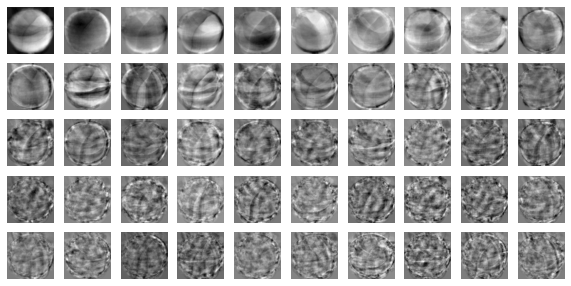

In [7]:
draw_fruits(pca.components_.reshape(-1, 100, 100))  # 주성분 50개의 모양.

### 주성분 50 개 (50, 10000) 그림 설명 <br>
이 그림이 어떤 의미가 있는지? 의미 확인 필요.

In [8]:
print(fruits_2d.shape)

(300, 10000)


In [9]:
fruits_pca = pca.transform(fruits_2d)

In [10]:
fruits_pca.shape  # 변환 후의 데이터 모양. 그림으로 표현할 수는 없고, 원래의 특성을 유지할 수 있는 50개의 특성값으로 재 구성됨.

(300, 50)

#### 변환 후의 데이터 모양. 모양을 그림으로 표현할 수는 없고, 원래의 특성을 유지할 수 있는 50개의 특성값으로 재 구성됨.

## 원본 데이터 재구성

In [11]:
fruits_inverse = pca.inverse_transform(fruits_pca)
print(fruits_inverse.shape)

(300, 10000)


In [12]:
fruits_reconstruct = fruits_inverse.reshape(-1, 100, 100)

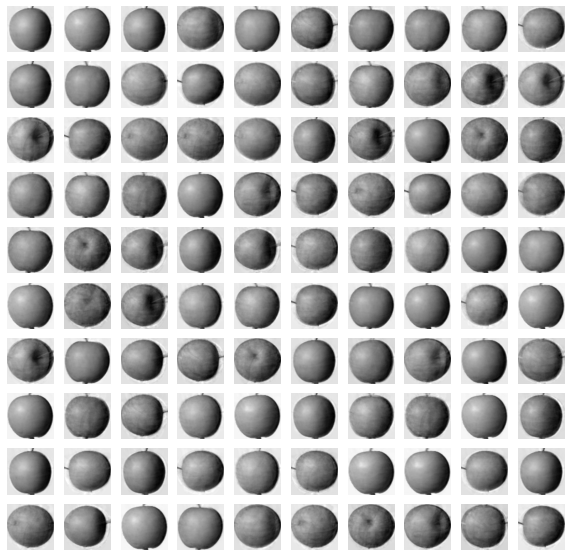

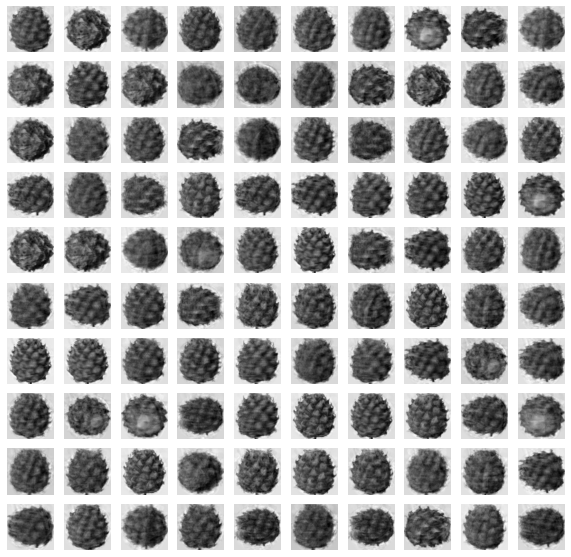

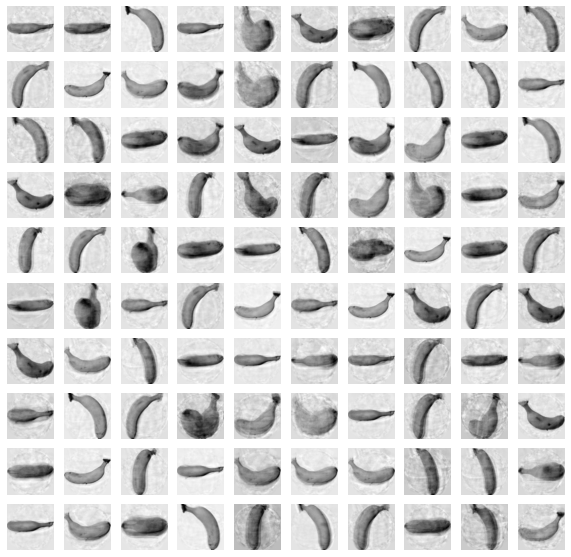

In [13]:
for start in [0, 100, 200]:
    draw_fruits(fruits_reconstruct[start:start+100])
    print("\n")

## 설명된 분산

In [14]:
print(np.sum(pca.explained_variance_ratio_)) # 원래 데이터의 92%를 설명하고 있다.

0.9215599794242881


In [15]:
pca.explained_variance_  # 설명된 분산이 저장됨

array([13825250.21582001,  3244970.17261194,  2147002.11072804,
        1315766.76701666,  1115261.57182821,  1071019.4251249 ,
         839909.33515117,   670735.97207138,   447908.41088451,
         438278.50209657,   376058.33559787,   308314.27053148,
         286653.1493994 ,   276360.40819462,   226209.96494665,
         210588.30890584,   188950.45249233,   166855.24973262,
         158754.34899368,   156784.1927655 ,   146172.16663527,
         142739.93446312,   133183.64179903,   127121.11804467,
         121563.53212552,   117271.73189195,   108187.69017582,
         103718.68501388,    99324.67848126,    99152.58099245,
          94307.21808894,    90041.48682501,    86463.12202358,
          83515.76560304,    82287.8867077 ,    80700.51199033,
          78187.93354613,    75203.30843483,    72338.55996929,
          70771.86455499,    69577.67546931,    64145.59127029,
          62812.1452615 ,    62269.75228021,    60434.07050891,
          58892.85242173,    56538.04313

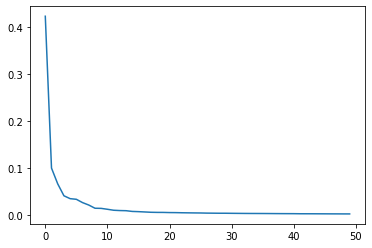

In [16]:
plt.plot(pca.explained_variance_ratio_)

## 다른 알고리즘과 함께 사용하기

In [17]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

In [18]:
target = np.array([0] * 100 + [1] * 100 + [2] * 100)

In [19]:
from sklearn.model_selection import cross_validate

scores = cross_validate(lr, fruits_2d, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.9966666666666667
1.4757311820983887


In [20]:
scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

1.0
0.038098716735839845


In [21]:
pca = PCA(n_components=0.5)
pca.fit(fruits_2d)

PCA(n_components=0.5)

In [22]:
print(pca.n_components_)

2


In [23]:
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)

(300, 2)


In [24]:
scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.9933333333333334
0.05012960433959961


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [25]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3, random_state=42)
km.fit(fruits_pca)

KMeans(n_clusters=3, random_state=42)

In [26]:
print(np.unique(km.labels_, return_counts=True))  # 차원 축소전(6-2 예)의 결과와 같음.

(array([0, 1, 2], dtype=int32), array([110,  99,  91]))


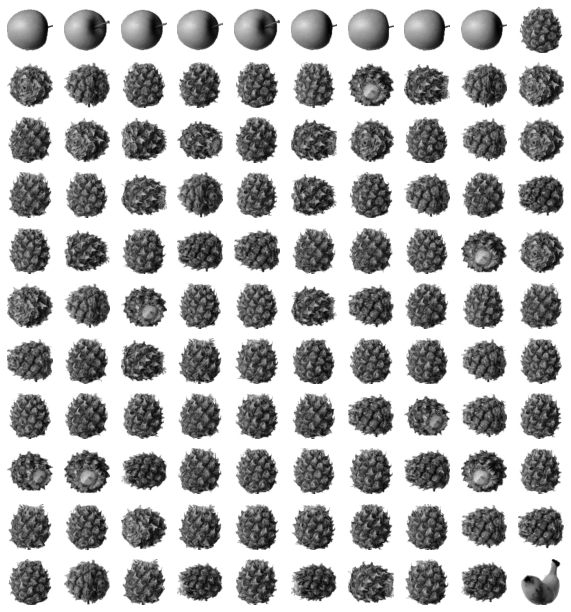

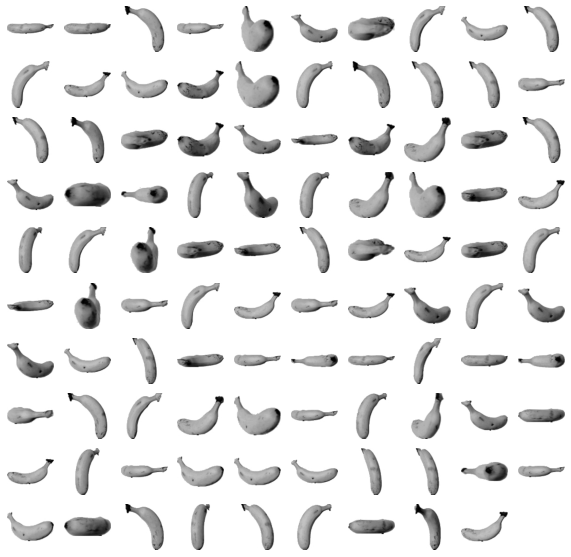

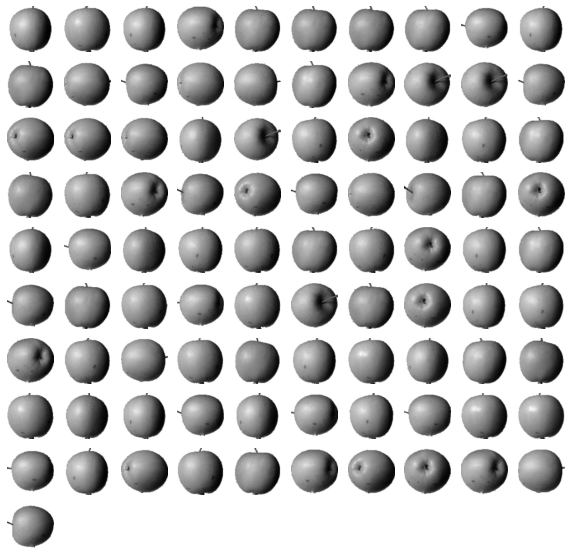

In [27]:
for label in range(0, 3):
    draw_fruits(fruits[km.labels_ == label])
    print("\n")

차원을 줄이면 시각화에도 도움이 된다.

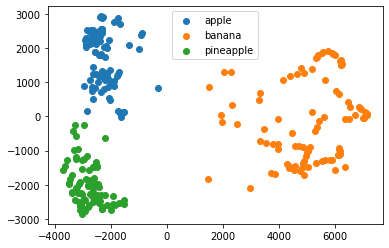

In [28]:
for label in range(0, 3):
    data = fruits_pca[km.labels_ == label]
    plt.scatter(data[:,0], data[:,1])
plt.legend(['apple', 'banana', 'pineapple'])
plt.show()